Resources:
- https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

In [2]:
from data_loaders import get_data_loaders
from resnet import ResNet, BottleNeckBlock, BasicBlock

import torch
import torchvision
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt
import numpy as np

In [2]:
writer = SummaryWriter()

In [3]:
# Smaller batch size simply for visualization
train_loader, _ = get_data_loaders(batch_size=10)

Files already downloaded and verified
Files already downloaded and verified


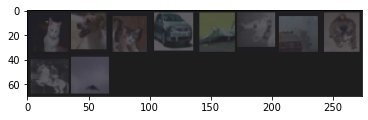

In [7]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

In [4]:
model = ResNet(3, 10, block_type=BottleNeckBlock, depths=[3, 4, 6, 3])

In [8]:
writer.add_graph(model, images)

In [3]:
train_loader, test_loader = get_data_loaders(batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
def test(model, test_loader, loss_fcn):
    """Function to run the test data in the `test_loader`
    Returns: tuple of accuracy and average loss
    """
    num_correct = 0
    avg_loss = 0
    for step, (data, targets) in enumerate(test_loader):
        data = data.cuda()
        targets = targets.cuda()

        with torch.no_grad():
            preds = model(data)

        loss = loss_fcn(preds, targets)
        avg_loss += loss.item()

        _, pred_labels = torch.max(preds, dim=1)
        
        num_correct += pred_labels.eq(targets).sum().item()

    # Because used a sum, make sure to divide by the length of total number in dataset
    acc = num_correct/len(test_loader.dataset)
    avg_loss /= len(test_loader)

    return acc, avg_loss

In [14]:
# Using same training code as before, but no need to print to the console, live plot is in tensorboard!
# Some hyper params
writer = SummaryWriter('./runs/attempt_1')
base_lr = 0.1
momentum = 0.9
weight_decay = 1e-4
lr_decay = 0.1
epochs = 100
log_freq = 150

model.cuda()

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=base_lr,
    momentum=momentum,
    weight_decay=weight_decay,
    nesterov=True)

scheduler = torch.optim.lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[25, 75],
    gamma=lr_decay)

loss_fcn = torch.nn.CrossEntropyLoss()

batch_count = 0
for epoch in range(epochs):
    scheduler.step()

    for step, (data, targets) in enumerate(train_loader):
        batch_count += 1
        # Move data to gpu
        data = data.cuda()
        targets = targets.cuda()

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(data)
        # Backprop
        loss = loss_fcn(outputs, targets)
        loss.backward()
        
        # Step optimizer
        optimizer.step()

        if step % log_freq == 0:
            writer.add_scalar('training_loss', loss.item(), global_step=batch_count)

    # Run on test data
    test_acc, test_loss = test(model, test_loader, loss_fcn)
    writer.add_scalar('testing_acc', test_acc, global_step=epoch)
    writer.add_scalar('testing_loss', test_loss, global_step=epoch)
    print('Done with epoch: %s'%epoch)

Done with epoch: 0
Done with epoch: 1
Done with epoch: 2
Done with epoch: 3
Done with epoch: 4
Done with epoch: 5
Done with epoch: 6
Done with epoch: 7
Done with epoch: 8
Done with epoch: 9
Done with epoch: 10
Done with epoch: 11
Done with epoch: 12
Done with epoch: 13
Done with epoch: 14
Done with epoch: 15
Done with epoch: 16
Done with epoch: 17
Done with epoch: 18
Done with epoch: 19
Done with epoch: 20
Done with epoch: 21
Done with epoch: 22
Done with epoch: 23
Done with epoch: 24
Done with epoch: 25
Done with epoch: 26
Done with epoch: 27
Done with epoch: 28
Done with epoch: 29
Done with epoch: 30
Done with epoch: 31
Done with epoch: 32
Done with epoch: 33
Done with epoch: 34
Done with epoch: 35
Done with epoch: 36
Done with epoch: 37
Done with epoch: 38
Done with epoch: 39
Done with epoch: 40
Done with epoch: 41
Done with epoch: 42
Done with epoch: 43
Done with epoch: 44
Done with epoch: 45
Done with epoch: 46
Done with epoch: 47
Done with epoch: 48
Done with epoch: 49
Done with 

In [15]:
writer.close()

In [17]:
# Some hyper params
writer = SummaryWriter('./runs/attempt_2')
base_lr = 0.1
momentum = 0.9
weight_decay = 1e-4
lr_decay = 0.1
epochs = 100
log_freq = 150

# Reset model
model = ResNet(3, 10, block_type=BottleNeckBlock, depths=[3, 4, 6, 3])
model.cuda()

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=base_lr,
    momentum=momentum,
    weight_decay=weight_decay,
    nesterov=True)

scheduler = torch.optim.lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[15, 25, 50, 75],
    gamma=lr_decay)

loss_fcn = torch.nn.CrossEntropyLoss()

batch_count = 0
for epoch in range(epochs):
    scheduler.step()

    for step, (data, targets) in enumerate(train_loader):
        batch_count += 1
        # Move data to gpu
        data = data.cuda()
        targets = targets.cuda()

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(data)
        # Backprop
        loss = loss_fcn(outputs, targets)
        loss.backward()
        
        # Step optimizer
        optimizer.step()

        if step % log_freq == 0:
            writer.add_scalar('training_loss', loss.item(), global_step=batch_count)

    # Run on test data
    test_acc, test_loss = test(model, test_loader, loss_fcn)
    writer.add_scalar('testing_acc', test_acc, global_step=epoch)
    writer.add_scalar('testing_loss', test_loss, global_step=epoch)
    print('Done with epoch: %s'%epoch)

Done with epoch: 0
Done with epoch: 1
Done with epoch: 2
Done with epoch: 3
Done with epoch: 4
Done with epoch: 5
Done with epoch: 6
Done with epoch: 7
Done with epoch: 8
Done with epoch: 9
Done with epoch: 10
Done with epoch: 11
Done with epoch: 12
Done with epoch: 13
Done with epoch: 14
Done with epoch: 15
Done with epoch: 16
Done with epoch: 17
Done with epoch: 18
Done with epoch: 19
Done with epoch: 20
Done with epoch: 21
Done with epoch: 22
Done with epoch: 23
Done with epoch: 24
Done with epoch: 25
Done with epoch: 26
Done with epoch: 27
Done with epoch: 28
Done with epoch: 29
Done with epoch: 30
Done with epoch: 31
Done with epoch: 32
Done with epoch: 33
Done with epoch: 34
Done with epoch: 35
Done with epoch: 36
Done with epoch: 37
Done with epoch: 38
Done with epoch: 39
Done with epoch: 40
Done with epoch: 41
Done with epoch: 42
Done with epoch: 43
Done with epoch: 44
Done with epoch: 45
Done with epoch: 46
Done with epoch: 47
Done with epoch: 48
Done with epoch: 49
Done with 

In [18]:
# Some hyper params
writer = SummaryWriter('./runs/attempt_3')
base_lr = 0.1
momentum = 0.9
weight_decay = 5e-4
lr_decay = 0.1
epochs = 100
log_freq = 150

# Reset model
model = ResNet(3, 10, block_type=BottleNeckBlock, depths=[3, 4, 6, 3])
model.cuda()

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=base_lr,
    momentum=momentum,
    weight_decay=weight_decay,
    nesterov=True)

scheduler = torch.optim.lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[20, 40, 60, 80],
    gamma=lr_decay)

loss_fcn = torch.nn.CrossEntropyLoss()

batch_count = 0
for epoch in range(epochs):
    scheduler.step()

    for step, (data, targets) in enumerate(train_loader):
        batch_count += 1
        # Move data to gpu
        data = data.cuda()
        targets = targets.cuda()

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(data)
        # Backprop
        loss = loss_fcn(outputs, targets)
        loss.backward()
        
        # Step optimizer
        optimizer.step()

        if step % log_freq == 0:
            writer.add_scalar('training_loss', loss.item(), global_step=batch_count)

    # Run on test data
    test_acc, test_loss = test(model, test_loader, loss_fcn)
    writer.add_scalar('testing_acc', test_acc, global_step=epoch)
    writer.add_scalar('testing_loss', test_loss, global_step=epoch)
    print('Done with epoch: %s'%epoch)

Done with epoch: 0
Done with epoch: 1
Done with epoch: 2
Done with epoch: 3
Done with epoch: 4
Done with epoch: 5
Done with epoch: 6
Done with epoch: 7
Done with epoch: 8
Done with epoch: 9
Done with epoch: 10
Done with epoch: 11
Done with epoch: 12
Done with epoch: 13
Done with epoch: 14
Done with epoch: 15
Done with epoch: 16
Done with epoch: 17
Done with epoch: 18
Done with epoch: 19
Done with epoch: 20
Done with epoch: 21
Done with epoch: 22
Done with epoch: 23
Done with epoch: 24
Done with epoch: 25
Done with epoch: 26
Done with epoch: 27
Done with epoch: 28
Done with epoch: 29
Done with epoch: 30
Done with epoch: 31
Done with epoch: 32
Done with epoch: 33
Done with epoch: 34
Done with epoch: 35
Done with epoch: 36
Done with epoch: 37
Done with epoch: 38
Done with epoch: 39
Done with epoch: 40
Done with epoch: 41
Done with epoch: 42
Done with epoch: 43
Done with epoch: 44
Done with epoch: 45
Done with epoch: 46
Done with epoch: 47
Done with epoch: 48
Done with epoch: 49
Done with 

In [6]:
# Some hyper params
writer = SummaryWriter('./runs/attempt_4')
base_lr = 0.1
momentum = 0.9
weight_decay = 5e-4
lr_decay = 0.1
epochs = 100
log_freq = 150

# Reset model
model = ResNet(3, 10, block_type=BasicBlock, depths=[9, 9, 9], block_sizes=[16,32,64])
model.cuda()

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=base_lr,
    momentum=momentum,
    weight_decay=weight_decay,
    nesterov=True)

scheduler = torch.optim.lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[20, 40, 60, 80],
    gamma=lr_decay)

loss_fcn = torch.nn.CrossEntropyLoss()

batch_count = 0
for epoch in range(epochs):
    scheduler.step()

    for step, (data, targets) in enumerate(train_loader):
        batch_count += 1
        # Move data to gpu
        data = data.cuda()
        targets = targets.cuda()

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(data)
        # Backprop
        loss = loss_fcn(outputs, targets)
        loss.backward()
        
        # Step optimizer
        optimizer.step()

        if step % log_freq == 0:
            writer.add_scalar('training_loss', loss.item(), global_step=batch_count)

    # Run on test data
    test_acc, test_loss = test(model, test_loader, loss_fcn)
    writer.add_scalar('testing_acc', test_acc, global_step=epoch)
    writer.add_scalar('testing_loss', test_loss, global_step=epoch)
    print('Done with epoch: %s'%epoch)

Done with epoch: 0
Done with epoch: 1
Done with epoch: 2
Done with epoch: 3
Done with epoch: 4
Done with epoch: 5
Done with epoch: 6
Done with epoch: 7
Done with epoch: 8
Done with epoch: 9
Done with epoch: 10
Done with epoch: 11
Done with epoch: 12
Done with epoch: 13
Done with epoch: 14
Done with epoch: 15
Done with epoch: 16
Done with epoch: 17
Done with epoch: 18
Done with epoch: 19
Done with epoch: 20
Done with epoch: 21
Done with epoch: 22
Done with epoch: 23
Done with epoch: 24
Done with epoch: 25
Done with epoch: 26
Done with epoch: 27
Done with epoch: 28
Done with epoch: 29
Done with epoch: 30
Done with epoch: 31
Done with epoch: 32
Done with epoch: 33
Done with epoch: 34
Done with epoch: 35
Done with epoch: 36
Done with epoch: 37
Done with epoch: 38
Done with epoch: 39
Done with epoch: 40
Done with epoch: 41
Done with epoch: 42
Done with epoch: 43
Done with epoch: 44
Done with epoch: 45
Done with epoch: 46
Done with epoch: 47
Done with epoch: 48
Done with epoch: 49
Done with 

KeyboardInterrupt: 

In [6]:

# Some hyper params
writer = SummaryWriter('./runs/pre-built-resnet')
base_lr = 0.1
momentum = 0.9
weight_decay = 5e-4
lr_decay = 0.1
epochs = 100
log_freq = 150

# Use the built-in model as a sanity check
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=False)
model.cuda()

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=base_lr,
    momentum=momentum,
    weight_decay=weight_decay,
    nesterov=True)

scheduler = torch.optim.lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[20, 40, 60, 80],
    gamma=lr_decay)

loss_fcn = torch.nn.CrossEntropyLoss()

batch_count = 0
for epoch in range(epochs):
    scheduler.step()

    for step, (data, targets) in enumerate(train_loader):
        batch_count += 1
        # Move data to gpu
        data = data.cuda()
        targets = targets.cuda()

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(data)
        # Backprop
        loss = loss_fcn(outputs, targets)
        loss.backward()
        
        # Step optimizer
        optimizer.step()

        if step % log_freq == 0:
            writer.add_scalar('training_loss', loss.item(), global_step=batch_count)

    # Run on test data
    test_acc, test_loss = test(model, test_loader, loss_fcn)
    writer.add_scalar('testing_acc', test_acc, global_step=epoch)
    writer.add_scalar('testing_loss', test_loss, global_step=epoch)
    print('Done with epoch: %s'%epoch)


Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to C:\Users\sorou/.cache\torch\hub\v0.6.0.zip
Done with epoch: 0
Done with epoch: 1
Done with epoch: 2
Done with epoch: 3
Done with epoch: 4
Done with epoch: 5
Done with epoch: 6
Done with epoch: 7
Done with epoch: 8
Done with epoch: 9
Done with epoch: 10
Done with epoch: 11
Done with epoch: 12
Done with epoch: 13
Done with epoch: 14
Done with epoch: 15
Done with epoch: 16
Done with epoch: 17
Done with epoch: 18
Done with epoch: 19
Done with epoch: 20
Done with epoch: 21
Done with epoch: 22
Done with epoch: 23
Done with epoch: 24
Done with epoch: 25
Done with epoch: 26
Done with epoch: 27
Done with epoch: 28
Done with epoch: 29
Done with epoch: 30
Done with epoch: 31
Done with epoch: 32
Done with epoch: 33
Done with epoch: 34
Done with epoch: 35
Done with epoch: 36
Done with epoch: 37
Done with epoch: 38
Done with epoch: 39
Done with epoch: 40
Done with epoch: 41
Done with epoch: 42
Done with epoch: 43
Done with epoch: